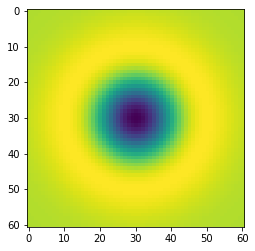

In [2]:
#Question 1
import numpy as np
import matplotlib.pyplot as plt

sigma = 10
hw = 3*sigma
x, y = np.meshgrid(np.arange(-hw, hw+1, 1), np.arange(-hw, hw+1, 1))
log = 1/(2*np.pi*sigma**2)*(x**2/(sigma**2) + y**2/(sigma**2) - 2)*np.exp(-(x**2+y**2)/(2*sigma**2))

plt.imshow(log)
plt.show()

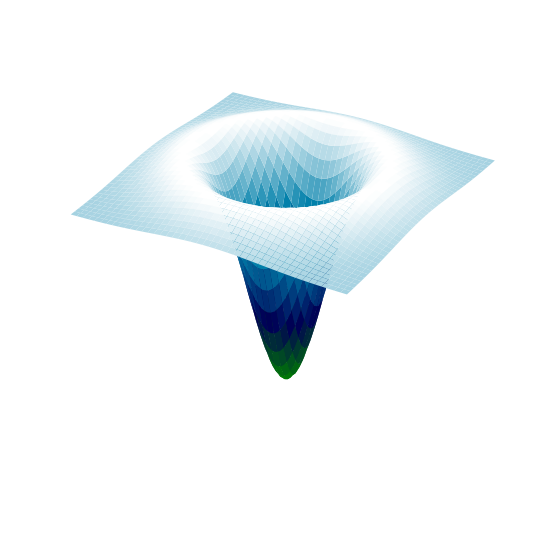

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator,FormatStrFormatter

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection='3d')

surf = ax.plot_surface(x,y,log, cmap=cm.ocean, linewidth=0, antialiased=True)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
plt.axis("off")
plt.show()

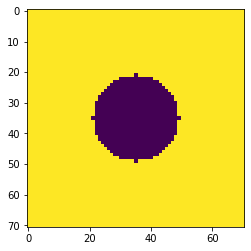

In [4]:
#Question 2
#Plotting the circle
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

w, h = 71, 71
hw, hh = w//2, h//2
f = np.ones((h,w),dtype=np.float32)*255
x, y = np.meshgrid(np.arange(-hh, hh+1, 1), np.arange(-hw, hw+1, 1))
r = w//5 #14
f *= x**2 + y**2>r**2
plt.imshow(f)
plt.show()

(35, 35, 5)
10


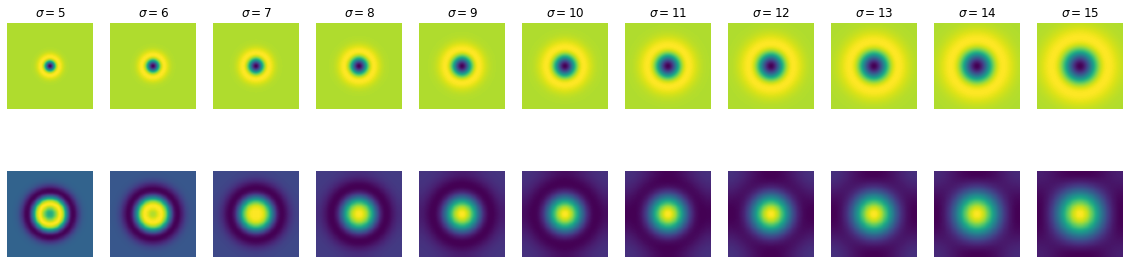

In [9]:
size = 11
fig, ax = plt.subplots(2, size, figsize=(20,5))
scale_space = np.empty((h, w, size), dtype=np.float32)
sigmas = np.arange(5,16,1)
for i,sigma in enumerate(sigmas):
    log_hw = 3*np.max(sigmas)
    x, y = np.meshgrid(np.arange(-log_hw, log_hw+1, 1), np.arange(-log_hw, log_hw+1, 1))
    log = 1/(2*np.pi*sigma**2)*(x**2/(sigma**2) + y**2/(sigma**2) - 2)*np.exp(-(x**2+y**2)/(2*sigma**2))
    f_log = cv.filter2D(f,-1,log)
    scale_space[:,:,i] = f_log
    ax[0,i].imshow(log)
    ax[0,i].axis("off")
    ax[0,i].set_title(r'$\sigma = {}$'.format(sigma))   
    ax[1,i].imshow(f_log)
    ax[1,i].axis("off")   

indices = np.unravel_index(np.argmax(scale_space, axis= None),scale_space.shape)
print(indices) #r=\sqrt{2}*sigma
print(sigmas[indices[2]])

Justification :- 
* According to $r/\sqrt2$, when the the radius of blob is equal to 14 scale space extremum occurs at $\sigma$ = 10.

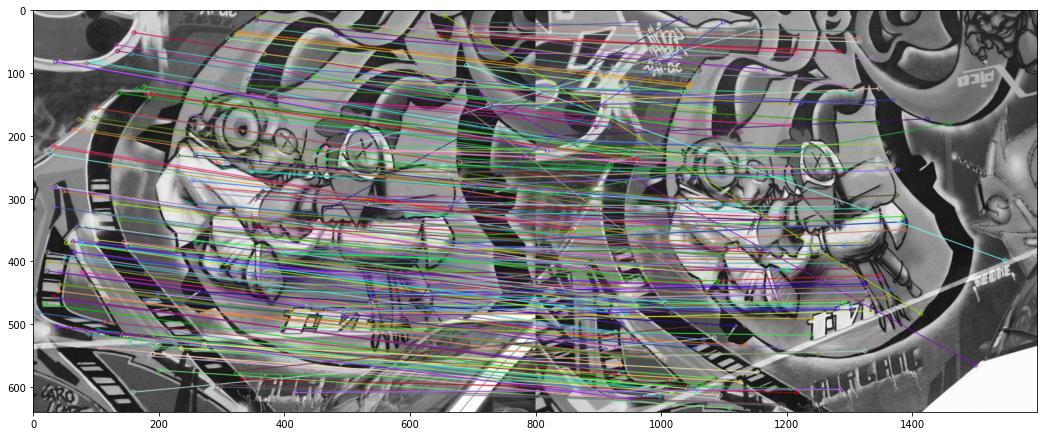

In [33]:
#Question 3
import cv2 as cv
import matplotlib.pyplot as plt

im1 = cv.imread("img1.ppm", cv.IMREAD_COLOR)
im2 = cv.imread("img2.ppm", cv.IMREAD_COLOR)

im1 = cv.cvtColor(im1, cv.COLOR_BGR2GRAY)
im2 = cv.cvtColor(im2, cv.COLOR_BGR2GRAY)

sift = cv.SIFT_create()

key_points_1, descriptors_1 = sift.detectAndCompute(im1,None) #sifting
key_points_2, descriptors_2 = sift.detectAndCompute(im2,None)

bf_match = cv.BFMatcher(cv.NORM_L1, crossCheck=True)  #feature matching
matches = sorted(bf_match.match(descriptors_1, descriptors_2), key = lambda x:x.distance)

im3 = cv.drawMatches(im1, key_points_1, im2, key_points_2, matches[:250], im2, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)  #draw lines between the matching features of two images
fig, ax = plt.subplots(figsize=(18,18))
ax.imshow(im3)
plt.show()

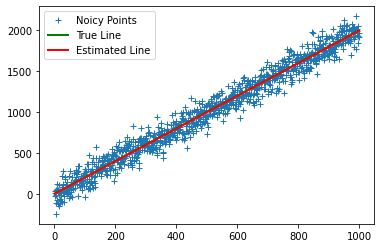

In [52]:
#Question 4
#Least squares line fitting
import numpy as np
import matplotlib.pyplot as plt

m = 2 #gradient
c = 1 #intercept
x = np.arange(1, 1000, 1)
np.random.seed(45)
sigma = 100
noise = sigma*np.random.randn(len(x))
o = np.zeros(x.shape)
#o[-1] = 20 #outline
y = m*x + c + noise + o

n = len(x)
X = np.concatenate([x.reshape(n,1), np.ones((n,1))], axis=1)
B = np.linalg.pinv(X.T @ X) @ X.T @ y
mstar = B[0]
cstar = B[1]

plt.plot(x, y, "+", label="Noicy Points")
plt.plot([x[0],x[-1]], [m*x[0]+c, m*x[-1]+c], color="g", linewidth=2, label=r"True Line")
plt.plot([x[0],x[-1]], [mstar*x[0]+cstar, mstar*x[-1]+cstar], color="r", linewidth=2, label=r"Estimated Line")
plt.legend()
plt.show()

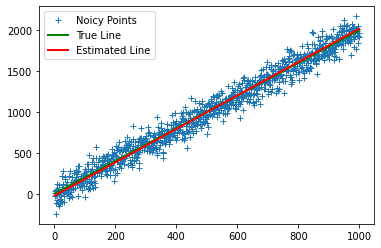

In [1]:
#Question 5
#Total Least squares line fitting
import numpy as np
import matplotlib.pyplot as plt

m = 2 #gradient
c = 1 #intercept
x = np.arange(1, 1000, 1)
np.random.seed(45)
sigma = 100
noise = sigma*np.random.randn(len(x))
o = np.zeros(x.shape)
#o[-1] = 20 #outline
y = m*x + c + noise + o

n = len(x)
u11 = np.sum((x-np.mean(x))**2)
u12 = np.sum((x-np.mean(x))*(y-np.mean(y)))
u21 = u12
u22 = np.sum((y-np.mean(y))**2)

u = np.array([[u11, u12], [u21,u22]])
w, v = np.linalg.eig(u)
ev_corresponding_to_smalest_ev = v[:,np.argmin(w)]

a = ev_corresponding_to_smalest_ev[0]
b = ev_corresponding_to_smalest_ev[1]
d = a*np.mean(x) + b*np.mean(y)

mstar = -a/b
cstar = d/b

plt.plot(x, y, "+", label="Noicy Points")
plt.plot([x[0],x[-1]], [m*x[0]+c, m*x[-1]+c], color="g", linewidth=2, label=r"True Line")
plt.plot([x[0],x[-1]], [mstar*x[0]+cstar, mstar*x[-1]+cstar], color="r", linewidth=2, label=r"Estimated Line")
plt.legend(loc="best")
plt.show()